# 1) Daily Stats S&P500 using yfinance API
* API: https://pypi.org/project/yfinance/ 
* Check the stats in the UI: https://finance.yahoo.com/quote/%5EGSPC

In [20]:
import yfinance as yf
from pandas_datareader import data as pdr

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [21]:
# Download historical data for SNP500 using YFinance
# https://finance.yahoo.com/quote/%5EGSPC
tickers = ['^GSPC']

start_date = "2000-01-01"
end_date = datetime.now().strftime('%Y-%m-%d')

print("Downloading historical data...")
yf_snp500_df = yf.download(tickers, 
                   start=start_date, 
                   end=end_date)
                #    multi_level_index=False)

# Get latest prices from the downloaded data
latest_date = yf_snp500_df.index[-1]
latest_prices = yf_snp500_df.iloc[-1]

[*********************100%%**********************]  1 of 1 completed


In [22]:
yf_snp500_df.keys()

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [23]:
yf_snp500_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-11-22,5944.359863,5972.899902,5944.359863,5969.339844,5969.339844,4141420000
2024-11-25,5992.279785,6020.750000,5963.910156,5987.370117,5987.370117,5633150000
2024-11-26,6000.029785,6025.419922,5992.270020,6021.629883,6021.629883,3835170000
2024-11-27,6014.109863,6020.160156,5984.870117,5998.740234,5998.740234,3363340000
2024-11-29,6003.979980,6044.169922,6003.979980,6032.379883,6032.379883,2444420000


<Axes: title={'center': 'S&P500 Daily Close Price from 2020'}, xlabel='Date'>

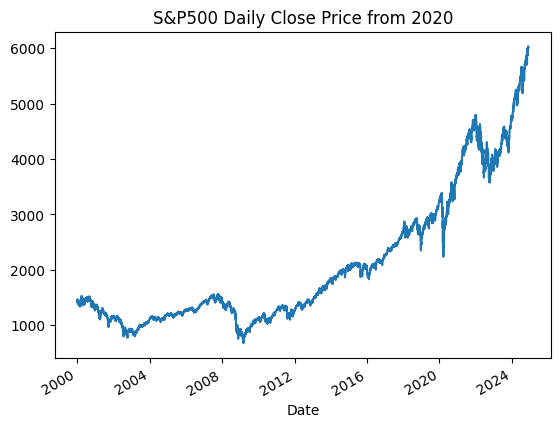

In [24]:
yf_snp500_df['Close'].plot.line(title="S&P500 Daily Close Price from 2020")

## 2) Daily S&P 500 stats using Pandas DataReader from FRED (Federal Reserve Bank of St. Louis)
* FRED is a database of over 267,000 economic time series from 80 sources
* it is a Python wrapper of FRED's API  
* if you want to download directly from API, here is an example: https://datons.ai/download-and-analyze-fred-data-automatically-with-python/

In [25]:
# download using Pandas DataReader / FRED Datasource
# URL: https://fred.stlouisfed.org/series/SP500
metric_code = "SP500"
fred_snp500_df = pdr.DataReader(metric_code, "fred", start=start_date)


In [26]:
fred_snp500_df.tail(10)

,SP500
DATE,
2024-11-18,5893.62
2024-11-19,5916.98
2024-11-20,5917.11
2024-11-21,5948.71
2024-11-22,5969.34
2024-11-25,5987.37
2024-11-26,6021.63
2024-11-27,5998.74
2024-11-28,NaN


## 3) Minute data of S&P 500 from YFinance
* we'll use BTC-USD minute data for the dashboards, as it is updated 24/7, and not only during the trading hours of the NYSE stock exchange 

In [27]:
# Minute data SNP500

# Calculate start date (limited to 7 days for minute data)
days_back = 5
end_date = datetime.now()
start_date = end_date - timedelta(days=min(days_back, 7))
    
# Fetch minute data
# interval options: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
# Create ticker object for S&P500
sp500 = yf.Ticker("^GSPC")
df = sp500.history(start=start_date, end=end_date, interval='1m')
    
# Convert timezone-aware index to timezone-naive for consistent processing
df.index = df.index.tz_localize(None)

In [28]:
import pandas as pd
from datetime import datetime, timedelta
import plotly.express as px

# Creating a sample dataframe for demonstration purposes
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2024-11-29 12:55:00,6040.000000,6040.000000,6034.950195,6036.089844,17010236,0.0,0.0
2024-11-29 12:56:00,6036.399902,6036.589844,6034.870117,6036.009766,13330662,0.0,0.0
2024-11-29 12:57:00,6035.919922,6035.979980,6034.529785,6035.200195,16207178,0.0,0.0
2024-11-29 12:58:00,6035.169922,6036.819824,6034.970215,6034.970215,19862608,0.0,0.0
2024-11-29 12:59:00,6034.979980,6035.879883,6033.319824,6034.109863,43307000,0.0,0.0


In [29]:
# df.index = pd.to_datetime(df['index'])

# Plotting the line plot using plotly express
fig = px.line(df, x=df.index, y='Close')
fig.update_layout(title=f"SNP&500 Close Price Minute Data for the Last {days_back} days")

In [30]:
# first value
first_value = df.head(1).Close.to_numpy()[0]
first_value

6022.81982421875

In [31]:
# first datetime
first_datetime = df.head(1).index.to_numpy()[0]
first_datetime

numpy.datetime64('2024-11-26T15:58:00.000000000')

In [32]:
# growth to the first value
df['Growth'] = 100.0 * df.Close/first_value

In [33]:
# Plotting the line plot using plotly express
fig = px.line(df, x=df.index, y='Growth')
fig.update_layout(title = f"SNP&500 GROWTH Minute Data since {first_datetime}")


In [34]:
# lat values as a table
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Growth
Datetime,,,,,,,,
2024-11-29 12:55:00,6040.000000,6040.000000,6034.950195,6036.089844,17010236,0.0,0.0,100.220329
2024-11-29 12:56:00,6036.399902,6036.589844,6034.870117,6036.009766,13330662,0.0,0.0,100.218999
2024-11-29 12:57:00,6035.919922,6035.979980,6034.529785,6035.200195,16207178,0.0,0.0,100.205558
2024-11-29 12:58:00,6035.169922,6036.819824,6034.970215,6034.970215,19862608,0.0,0.0,100.201739
2024-11-29 12:59:00,6034.979980,6035.879883,6033.319824,6034.109863,43307000,0.0,0.0,100.187454


## 4) Saving to a file/DB and reading from it

In [ ]:
# Saving data to a file
from sqlalchemy import create_engine
import os

# Directory to save data
DATA_DIR = '../data'

# Ensure data directory exists
os.makedirs(DATA_DIR, exist_ok=True)

# SQLite database path
DB_PATH = os.path.join(DATA_DIR, 'test_db.db')

# Create SQLAlchemy engine
engine = create_engine(f'sqlite:///{DB_PATH}')

In [36]:
# Save to parquet and SQLite
print("\nSaving data to files/DB...")
table_name = 'snp_500_minute_yfinance'
# Save to parquet
df.to_parquet(os.path.join(DATA_DIR, f'{table_name}.parquet'))

# Save to SQLite
df.to_sql(f'{table_name}', engine, if_exists='replace')



Saving data to files/DB...


600

In [37]:
df2 = pd.read_parquet(os.path.join(DATA_DIR, f'{table_name}.parquet'))

df2.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Growth
Datetime,,,,,,,,
2024-11-26 15:58:00,6021.709961,6022.819824,6021.140137,6022.819824,0,0.0,0.0,100.000000
2024-11-26 15:59:00,6023.069824,6023.350098,6020.279785,6020.740234,60227000,0.0,0.0,99.965471
2024-11-27 09:30:00,6014.109863,6015.509766,6010.939941,6011.359863,0,0.0,0.0,99.809724
2024-11-27 09:31:00,6011.169922,6012.169922,6009.339844,6011.549805,11999520,0.0,0.0,99.812878
2024-11-27 09:32:00,6011.439941,6013.339844,6010.660156,6013.339844,9084764,0.0,0.0,99.842599


In [38]:
df_from_db = pd.read_sql(table_name, engine) 

df_from_db.head()

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits,Growth
0,2024-11-26 15:58:00,6021.709961,6022.819824,6021.140137,6022.819824,0,0.0,0.0,100.000000
1,2024-11-26 15:59:00,6023.069824,6023.350098,6020.279785,6020.740234,60227000,0.0,0.0,99.965471
2,2024-11-27 09:30:00,6014.109863,6015.509766,6010.939941,6011.359863,0,0.0,0.0,99.809724
3,2024-11-27 09:31:00,6011.169922,6012.169922,6009.339844,6011.549805,11999520,0.0,0.0,99.812878
4,2024-11-27 09:32:00,6011.439941,6013.339844,6010.660156,6013.339844,9084764,0.0,0.0,99.842599
